In [1]:
# Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Reading the Storm_Yearwise_Data.csv file as year_df1

states = pd.read_csv('Research_Project_MDS6406/Datasets/Storm_Yearwise_Data.csv')
states.head()

,RegionName,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,West Bengal Coastal Region,0,0,3,1,0,2,1,1,0,...,0,0,1,1,1,0,0,3,1,1
1,Odisha Coastal Region,0,0,2,0,0,1,0,1,0,...,0,0,1,1,1,0,0,2,3,1
2,Andhra Pradesh Coastal Region,2,1,0,1,0,2,1,0,0,...,0,1,3,1,2,1,1,3,0,0
3,Tamil Nadu Coastal Region,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,1,0,1


In [3]:
# Get the Shape of the data frame

states.shape

(4, 22)

In [4]:
# Setting the Index by the RegionName column

states_index = states.set_index('RegionName')
states_index.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
RegionName,,,,,,,,,,,,,,,,,,,,,
West Bengal Coastal Region,0,0,3,1,0,2,1,1,0,1,...,0,0,1,1,1,0,0,3,1,1
Odisha Coastal Region,0,0,2,0,0,1,0,1,0,1,...,0,0,1,1,1,0,0,2,3,1
Andhra Pradesh Coastal Region,2,1,0,1,0,2,1,0,0,0,...,0,1,3,1,2,1,1,3,0,0
Tamil Nadu Coastal Region,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,1,0,1


In [5]:
# Extracting the Years Information as years

years = list(map(str,range(2000,2021)))

In [6]:
# Extracting the Information for the mentioned 4 regions

wbcr = states_index.loc['West Bengal Coastal Region', years]
ocr = states_index.loc['Odisha Coastal Region', years]
apcr = states_index.loc['Andhra Pradesh Coastal Region', years]
tncr = states_index.loc['Tamil Nadu Coastal Region', years]

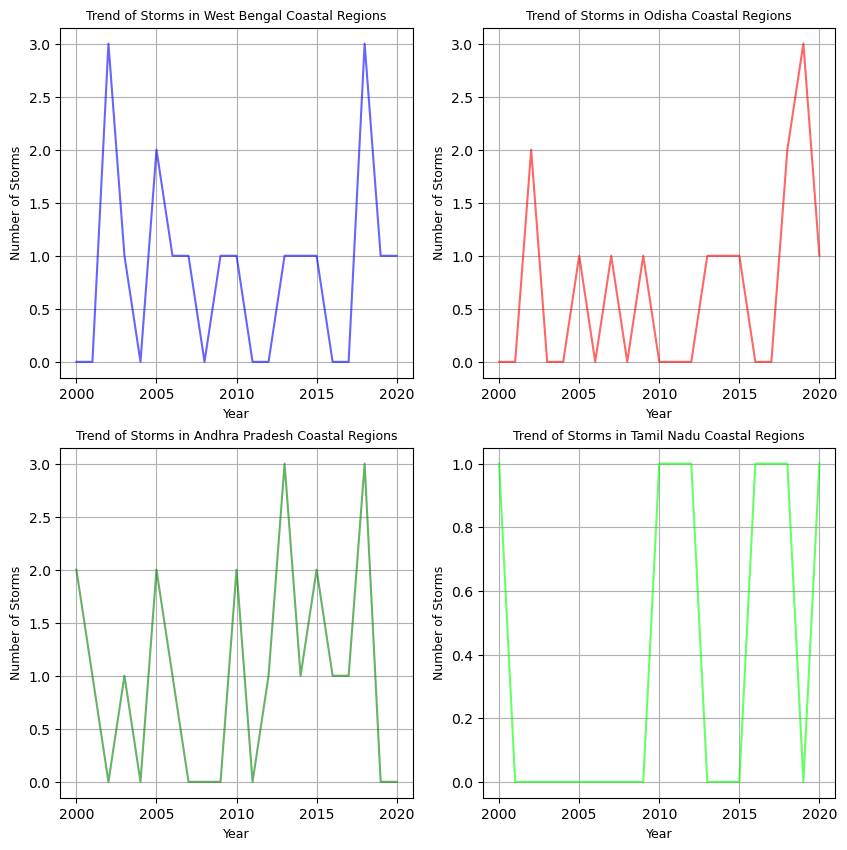

In [7]:
# Plotting a Subplot to know the trend of Storm in these four coastal Regions

# Initializing the Subplots and Setting the Figure Size
fig = plt.figure(figsize = (10,10))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

# Plotting the First Plot for West Bengal Coastal Region
wbcr.plot(kind = 'line', color = 'blue', alpha = 0.6, ax = ax0)
ax0.set_title('Trend of Storms in West Bengal Coastal Regions', fontsize = 9)
ax0.set_xlabel('Year', fontsize = 9)
ax0.set_ylabel('Number of Storms', fontsize = 9)
ax0.grid()

# Plotting the First Plot for Odisha Coastal Region
ocr.plot(kind = 'line', color = 'red', alpha = 0.6, ax = ax1)
ax1.set_title('Trend of Storms in Odisha Coastal Regions', fontsize = 9)
ax1.set_xlabel('Year', fontsize = 9)
ax1.set_ylabel('Number of Storms', fontsize = 9)
ax1.grid()

# Plotting the First Plot for Andhra Pradesh Coastal Region
apcr.plot(kind = 'line', color = 'green', alpha = 0.6, ax = ax2)
ax2.set_title('Trend of Storms in Andhra Pradesh Coastal Regions', fontsize = 9)
ax2.set_xlabel('Year', fontsize = 9)
ax2.set_ylabel('Number of Storms', fontsize = 9)
ax2.grid()

# Plotting the First Plot for Tamil Nadu Coastal Region
tncr.plot(kind = 'line', color = 'lime', alpha = 0.6, ax = ax3)
ax3.set_title('Trend of Storms in Tamil Nadu Coastal Regions', fontsize = 9)
ax3.set_xlabel('Year', fontsize = 9)
ax3.set_ylabel('Number of Storms', fontsize = 9)
ax3.grid()

# Showing the Final Image
plt.show()

In [62]:
# Reading the data set, specific for West Bengal Coastal Regions

wbregions = pd.read_csv('Research_Project_MDS6406/Datasets/WBCRYearwiseIncAffect.csv')
wbregions.head()

,Year,WBCRInc,WBCRAffect,WBBudgetRs
0,2000,0,0.0,331500000
1,2001,0,0.0,4000000
2,2002,3,5050.0,1300000000
3,2003,1,323940.0,395481525
4,2004,0,0.0,398153458


In [63]:
# Checking the shpe of the data frame

wbregions.shape

(21, 4)

In [64]:
# Checking for Missing Values in the data frame

wbregions.isnull().sum()

Year          0
WBCRInc       0
WBCRAffect    3
WBBudgetRs    0
dtype: int64

In [65]:
# Handling Missing Values
# Filling these values with the Mean of the 'WBCRAffect' column

meanaffect = np.mean(wbregions['WBCRAffect'])
wbregions = wbregions.fillna(meanaffect)

In [66]:
# Cgheck for Missing Value

wbregions.isnull().sum()

Year          0
WBCRInc       0
WBCRAffect    0
WBBudgetRs    0
dtype: int64

In [67]:
wbregions.dtypes

Year            int64
WBCRInc         int64
WBCRAffect    float64
WBBudgetRs      int64
dtype: object

In [68]:
# Finding Affected Population per 10 Lakh and create another column called 'Affectedpertenlakh'

wbregions['Affectedpertenlakh'] = wbregions['WBCRAffect']/1000000

# Create Another Column 'WBBudget10cr' that will convert the Rs. into crore unit

wbregions['WBBudget10cr'] = wbregions['WBBudgetRs'] / 100000000

wbregions

,Year,WBCRInc,WBCRAffect,WBBudgetRs,Affectedpertenlakh,WBBudget10cr
0,2000,0,0.000000e+00,331500000,0.000000,3.315000
1,2001,0,0.000000e+00,4000000,0.000000,0.040000
2,2002,3,5.050000e+03,1300000000,0.005050,13.000000
3,2003,1,3.239400e+05,395481525,0.323940,3.954815
4,2004,0,0.000000e+00,398153458,0.000000,3.981535
5,2005,2,2.536000e+03,1008328695,0.002536,10.083287
6,2006,1,3.757500e+04,2499309042,0.037575,24.993090
7,2007,1,3.923839e+05,4525991269,0.392384,45.259913
8,2008,0,0.000000e+00,2741123096,0.000000,27.411231
9,2009,1,1.700000e+06,5508826070,1.700000,55.088261


In [69]:
# Extracting Values from wbregions to create the plot

years = wbregions['Year']
incident = wbregions['WBCRInc']
affectedtenlakh = wbregions['Affectedpertenlakh']
budget = wbregions['WBBudget10cr']

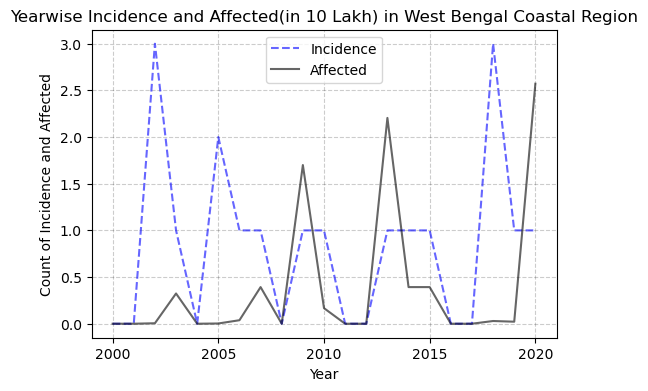

In [15]:
# Plotting The Incident and Affected per 10 Lakhs with respect to year

plt.figure(figsize = (6,4))
plt.plot(years, incident, color = 'blue', alpha = 0.6, linestyle = '--')
plt.plot(years, affectedtenlakh, color = 'black', alpha = 0.6, linestyle = '-')
plt.title('Yearwise Incidence and Affected(in 10 Lakh) in West Bengal Coastal Region')
plt.xlabel('Year')
plt.ylabel('Count of Incidence and Affected')
plt.legend(['Incidence', 'Affected'])
plt.xticks(range(2000, 2021, 5))
plt.grid(color = 'black', linestyle = '--', alpha = 0.2)
plt.show()

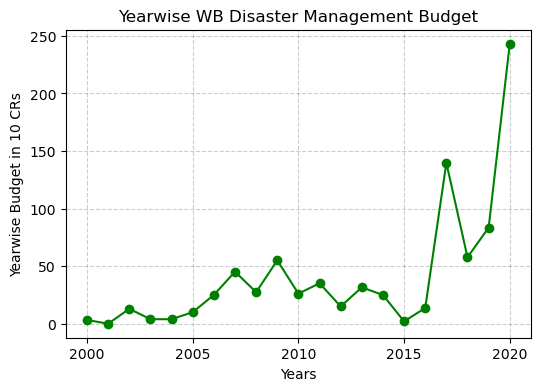

In [76]:
# Plot the Yearwise Budget that we get from the data

plt.figure(figsize = (6,4))
plt.plot(years, budget, color = 'green', marker = 'o')
plt.xlabel('Years')
plt.ylabel('Yearwise Budget in 10 CRs')
plt.xticks(range(2000, 2021, 5))
plt.grid(color = 'black', linestyle = '--', alpha = 0.2)
plt.title('Yearwise WB Disaster Management Budget')
plt.show()

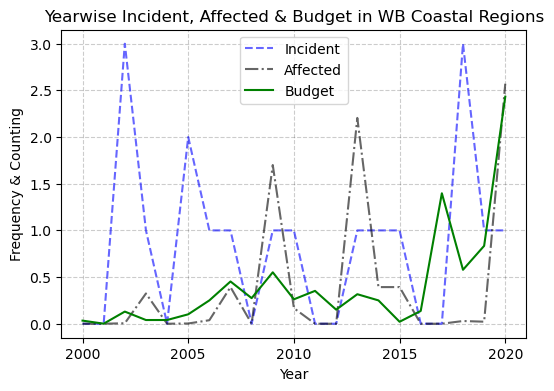

In [82]:
# For Plotting Purpose, I am further reducing the magnitude of the 'Budget10cr' column

wbregions['BudgetReduced'] = wbregions['WBBudget10cr']/100
    
reducebudget = wbregions['BudgetReduced']

# Plotting the No. of Incident, No.Affected and Budget allocated in WB yearwise

plt.figure(figsize = (6,4))
plt.plot(years, incident, color = 'blue',ls = '--', alpha = 0.6)
plt.plot(years, affectedtenlakh, color = 'black', alpha = 0.6, linestyle = '-.')
plt.plot(years, reducebudget, color = 'green')
plt.xlabel('Year')
plt.ylabel('Frequency & Counting')
plt.title('Yearwise Incident, Affected & Budget in WB Coastal Regions')
plt.legend(['Incident','Affected','Budget'])
plt.xticks(range(2000,2021,5))
plt.grid(color = 'black', linestyle = '--', alpha = 0.2)
plt.show()